In [2]:
import os
import json
from collections import defaultdict
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [3]:
poland_files = sorted(
    [
        file
        for file in os.listdir("../data/videos/last/poland")
        if file.endswith(".json") and "progress" not in file
    ]
)
us_files = sorted(
    [
        file
        for file in os.listdir("../data/videos/last/united-states")
        if file.endswith(".json") and "progress" not in file
    ]
)

files_df = pd.DataFrame(
    columns=["File name", "Objects number", "Country"],
    index=range(len(poland_files) + len(us_files)),
)
pl_data = []
us_data = []
for i, file in enumerate(poland_files):
    with open(f"../data/videos/last/poland/{file}", "r", encoding="utf-8") as f:
        data = json.load(f)
        pl_data.extend(data)
    files_df.loc[i] = [file, len(data), "Poland"]
for i, file in enumerate(us_files):
    with open(f"../data/videos/last/united-states/{file}", "r", encoding="utf-8") as f:
        data = json.load(f)
        us_data.extend(data)
    files_df.loc[i + len(poland_files)] = [file, len(data), "United States"]

files_df

,File name,Objects number,Country
0,1 - 50.json,50,Poland
1,101 - 150.json,50,Poland
2,151 - 200.json,50,Poland
3,201 - 250.json,50,Poland
4,251 - 300.json,50,Poland
5,301 - 350.json,50,Poland
6,351 - 397.json,47,Poland
7,398 - 447.json,50,Poland
8,448 - 497.json,50,Poland
9,498 - 547.json,50,Poland


In [4]:
# sanity_check
assert len(pl_data) == sum(files_df[files_df["Country"] == "Poland"]["Objects number"])
assert len(us_data) == sum(files_df[files_df["Country"] == "United States"]["Objects number"])

if not len(us_data) == 1000:
    missing_channels = [rank for rank in range(1, 1001) if rank not in [obj["channel"]["rank"] for obj in us_data]]
    print("US missing_channels:", missing_channels)

if not len(pl_data) == 1000:
    missing_channels = [rank for rank in range(1, 1001) if rank not in [obj["channel"]["rank"] for obj in pl_data]]
    print("PL missing_channels:", missing_channels)

US missing_channels: [599, 749]
PL missing_channels: []


In [5]:
yt_categories = {
    "1": "Film & Animation",
    "2": "Autos & Vehicles",
    "10": "Music",
    "15": "Pets & Animals",
    "17": "Sports",
    "18": "Short Movies",
    "19": "Travel & Events",
    "20": "Gaming",
    "21": "Videoblogging",
    "22": "People & Blogs",
    "23": "Comedy",
    "24": "Entertainment",
    "25": "News & Politics",
    "26": "Howto & Style",
    "27": "Education",
    "28": "Science & Technology",
    "29": "Nonprofits & Activism",
    "30": "Movies",
    "31": "Anime/Animation",
    "32": "Action/Adventure",
    "33": "Classics",
    "34": "Comedy",
    "35": "Documentary",
    "36": "Drama",
    "37": "Family",
    "38": "Foreign",
    "39": "Horror",
    "40": "Sci-Fi/Fantasy",
    "41": "Thriller",
    "42": "Shorts",
    "43": "Shows",
    "44": "Trailers",
}

In [6]:
for channel_idx in range(len(pl_data)):
    try:
        video_categories_count = defaultdict(int)
        for video in pl_data[channel_idx]["videos"]:
            video_categories_count[yt_categories[video["category"]]] += 1
        pl_data[channel_idx]["channel"]["category"] = max(
            video_categories_count, key=video_categories_count.get
        )
    except ValueError:
        print(
            f"Channel {pl_data[channel_idx]['channel']['name']} has no videos - setting category to Unknown"
        )
        pl_data[channel_idx]["channel"]["category"] = "Unknown"

Channel TheNitroZyniak has no videos - setting category to Unknown
Channel MagdalenaMariaMonika has no videos - setting category to Unknown
Channel ZDROWE i SMACZNE przepisy. has no videos - setting category to Unknown
Channel skkf has no videos - setting category to Unknown
Channel Daniel Midas has no videos - setting category to Unknown
Channel NotAffiliated has no videos - setting category to Unknown
Channel Marta Mówi [Martha Speaks] - WildBrain has no videos - setting category to Unknown
Channel Jachimozo has no videos - setting category to Unknown
Channel forumwiedzy has no videos - setting category to Unknown
Channel Mateusz Chmielarek has no videos - setting category to Unknown
Channel Jaszczur4Fun has no videos - setting category to Unknown
Channel Karolina Witaszek has no videos - setting category to Unknown


In [7]:
for channel_idx in range(len(us_data)):
    try:
        video_categories_count = defaultdict(int)
        for video in us_data[channel_idx]["videos"]:
            video_categories_count[yt_categories[video["category"]]] += 1
        us_data[channel_idx]["channel"]["category"] = max(
            video_categories_count, key=video_categories_count.get
        )
    except ValueError:
        print(
            f"Channel {us_data[channel_idx]['channel']['name']} has no videos - setting category to Unknown"
        )
        us_data[channel_idx]["channel"]["category"] = "Unknown"

Channel Kaykai Salaider has no videos - setting category to Unknown
Channel Bon Bon Animal HT has no videos - setting category to Unknown
Channel Savage Vlogs has no videos - setting category to Unknown
Channel Kids Marie Show has no videos - setting category to Unknown
Channel Chiko TV has no videos - setting category to Unknown
Channel SrJinxed has no videos - setting category to Unknown


In [8]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji
import nltk
from num2words import num2words
from langdetect import detect, lang_detect_exception
from tqdm.notebook import tqdm
from transformers import pipeline

nltk.download("stopwords", quiet=True, raise_on_error=True, download_dir="../models/nltk_data")
nltk.download('punkt_tab', quiet=True, raise_on_error=True, download_dir="../models/nltk_data")
nltk.data.path.append("../models/nltk_data")

In [9]:
def get_translation_model(from_lang, to_lang):
    models_dir = "../models"
    if not os.path.exists(models_dir):
        os.makedirs(models_dir)
    if not os.path.exists(f"{models_dir}/translation"):
        os.makedirs(f"{models_dir}/translation")
    if f"Helsinki-NLP/opus-mt-{from_lang}-{to_lang}" not in os.listdir(f"{models_dir}/translation"):
        return pipeline("translation", model=f"Helsinki-NLP/opus-mt-{from_lang}-{to_lang}")
    else:
        return pipeline(
            "translation",
            model=f"{models_dir}/translation/Helsinki-NLP/opus-mt-{from_lang}-{to_lang}",
        )


def save_translation_model(model, from_lang, to_lang):
    models_dir = "../models"
    if not os.path.exists(models_dir):
        os.makedirs(models_dir)
    if not os.path.exists(f"{models_dir}/translation"):
        os.makedirs(f"{models_dir}/translation")
    model.save_pretrained(f"{models_dir}/translation/Helsinki-NLP/opus-mt-{from_lang}-{to_lang}")

In [10]:
def clean_text(text):
    pattern = r"""
        <.*?> |                               # HTML tags
        \b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b |  # Emails
        (https?:\/\/|www\.)\S+ |              # URLs starting with http, https, or www
        \b\S+\.(com|org|net|ly|co|ly|pl|uk)\b    # Specific domains
    """
    text = re.sub(pattern, "", text, flags=re.VERBOSE)
    return text


def text_lowercase(text: str):
    return text.lower()


def demojize(text: str) -> str:
    return emoji.replace_emoji(text, "")


def convert_number(text: str) -> str:
    words = text.split()
    for word in words:
        if word.isdigit():
            try:
                words[words.index(word)] = num2words(word)
            except ValueError:
                continue
    return text


def remove_punctuation(text: str) -> str:
    return text.translate(str.maketrans("", "", string.punctuation))


def remove_whitespace(text: str) -> str:
    return " ".join(text.split())


def remove_stopwords(text: str) -> str:
    stop_words = set(stopwords.words("english"))
    words = word_tokenize(text)
    return " ".join(word for word in words if word not in stop_words)


def translate_text(text: str, from_lang, to_lang) -> str:
    if from_lang == to_lang:
        return text
    try:
        model = get_translation_model(from_lang, to_lang)
        translation = model(text)
        save_translation_model(model, from_lang, to_lang)
        return translation[0]["translation_text"]
    except Exception as e:
        print(f"Translation failed: {e}")
        return ""

In [11]:
def preprocess_text(text: str, lang: str = None) -> str:

    text = clean_text(text)

    text = text_lowercase(text)

    text = remove_punctuation(text)

    text = remove_whitespace(text)
    
    text = demojize(text)
    
    if lang:
        text = convert_number(text)
        
        text = translate_text(text, lang, "en")

        text = remove_stopwords(text)

    return text

In [12]:
def get_category_distribution(channels):
    category_distribution = defaultdict(int)
    for channel in channels:
        category_distribution[channel["channel"]["category"]] += 1
    return category_distribution

In [13]:
pl_category_distribution = get_category_distribution(pl_data)
us_category_distribution = get_category_distribution(us_data)

categories_df = (
    pd.DataFrame(
        [pl_category_distribution, us_category_distribution], index=["Poland", "United States"]
    )
    .T.fillna(0)
    .astype(int, errors="ignore")
)
categories_df

,Poland,United States
Entertainment,480,700
Film & Animation,84,102
People & Blogs,314,282
Gaming,186,103
Music,109,116
Unknown,12,6
Howto & Style,114,116
Science & Technology,16,11
Sports,39,16
Comedy,35,58


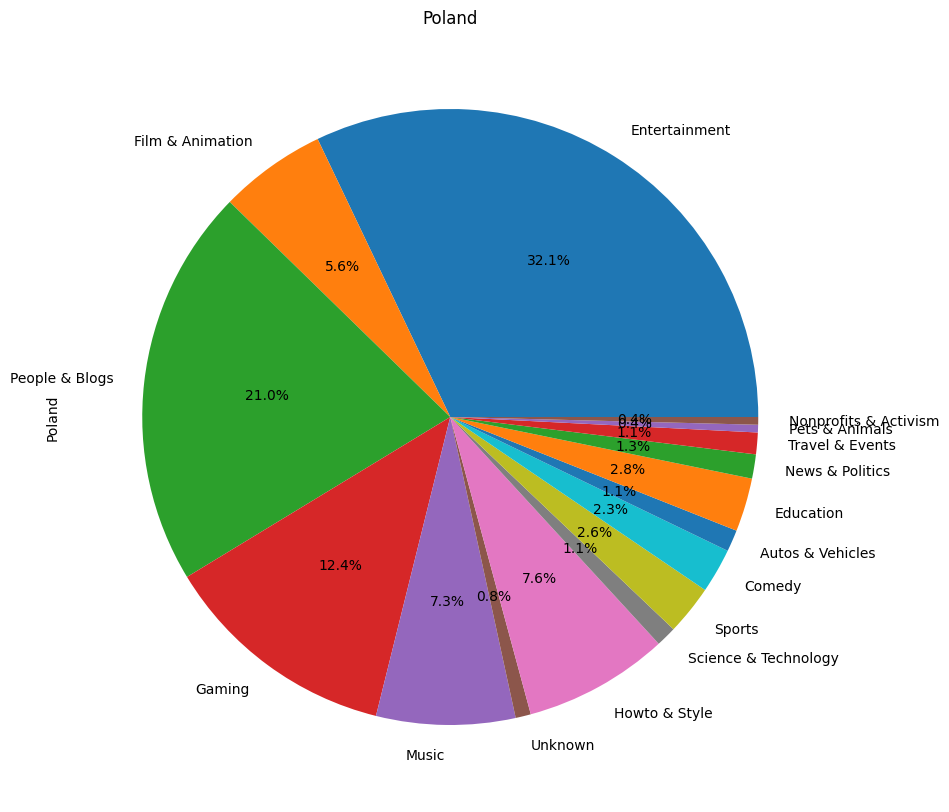

In [14]:
pie_categories_poland = categories_df["Poland"].plot.pie(
    title="Poland", autopct="%1.1f%%", figsize=(10, 10)
)

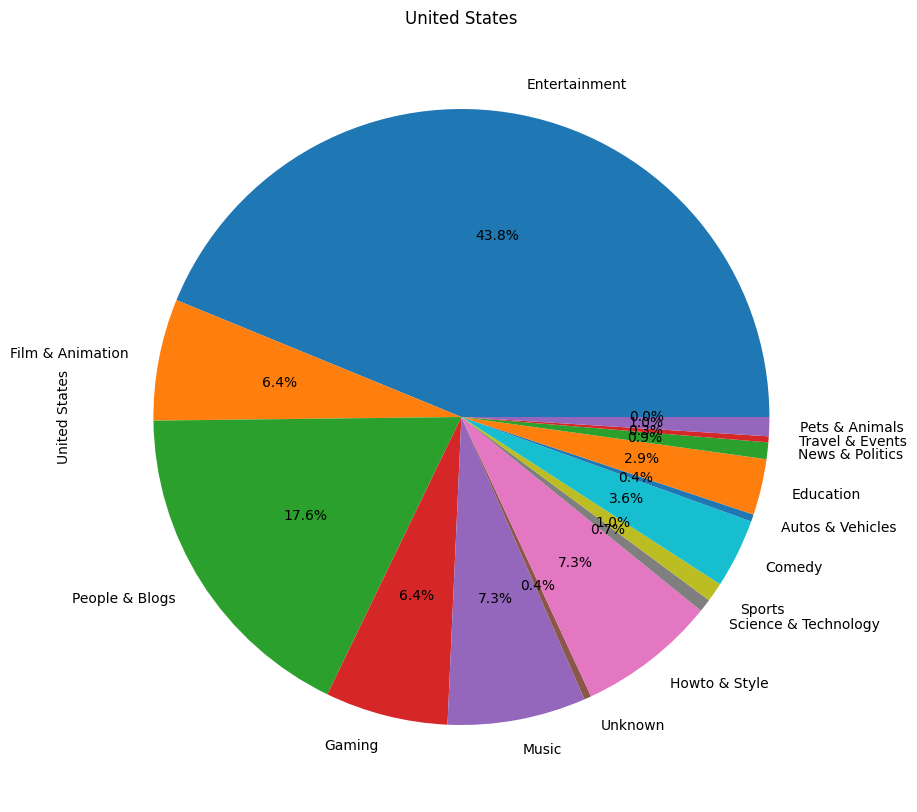

In [15]:
pie_categories_us = categories_df["United States"].plot.pie(
    title="United States", autopct="%1.1f%%", figsize=(10, 10)
)

In [16]:
relevant_categories = [
    "Film & Animation",
    "Entertainment",
    "People & Blogs",
    "Howto & Style",
]

relevant_pl_data = {}
relevant_us_data = {}

for category in relevant_categories:
    relevant_pl_data[category] = [
        channel for channel in pl_data if channel["channel"]["category"] == category
    ]
    relevant_us_data[category] = [
        channel for channel in us_data if channel["channel"]["category"] == category
    ]

In [17]:
def save_json(data, file):
    with open(file, "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=4)
        
def load_json(file):
    with open(file, "r", encoding="utf-8") as f:
        return json.load(f)

In [18]:
only_pl_channels = {category: [] for category in relevant_categories}
for category, data in relevant_pl_data.items():
    for idx, channel in enumerate(data):
        try:
            concat_channel_titles = " ".join([video["title"] for video in channel["videos"]])
            clean = preprocess_text(concat_channel_titles)
            lang = detect(clean)
            if lang == "pl":
                only_pl_channels[category].append(channel)
        except lang_detect_exception.LangDetectException:
            print(f"Failed to detect language for channel {channel['channel']['name']}")
            continue

In [19]:
only_us_channels = {category: [] for category in relevant_categories}
for category, data in relevant_us_data.items():
    for idx, channel in enumerate(data):
        try:
            concat_channel_titles = " ".join([video["title"] for video in channel["videos"]])
            clean = preprocess_text(concat_channel_titles)
            lang = detect(clean)
            if lang == "en":
                only_us_channels[category].append(channel)
        except lang_detect_exception.LangDetectException:
            print(f"Language detection failed for channel {channel['channel']['name']}")
            continue

Language detection failed for channel LOL By Banyar Official
Language detection failed for channel LOL By Banyar Official


In [20]:
for category in relevant_categories:
    save_json(only_pl_channels[category], f"../data/videos/last/poland/{category}.json")
    save_json(only_us_channels[category], f"../data/videos/last/united-states/{category}.json")

In [21]:
# only_pl = list(filter(lambda x: x["channel"]["language"] == "pl", pl_data))
# for channel in tqdm(only_pl, total=len(only_pl), desc="Preprocessing Polish videos"):
#     for video in channel["videos"]:
#         try:
#             clean_title = preprocess_text(video["title"], "pl")
#             video["title"] = clean_title
#         except Exception as e:
#             print(f"Error for channel {channel['channel']['name']}: {e}")
#     only_pl[only_pl.index(channel)] = channel

In [22]:
# only_us = list(filter(lambda x: x["channel"]["language"] == "en", us_data))
# for channel in tqdm(only_us, total=len(only_us), desc="Preprocessing English videos"):
#     for video in channel["videos"]:
#         try:
#             clean_title = preprocess_text(video["title"], "en")
#             video["title"] = clean_title
#         except Exception as e:
#             print(f"Error for channel {channel['channel']['name']}: {e}")
#     only_us[only_us.index(channel)] = channel